## Image Captioning:

![Image captioning](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/I_VlgpvaEeeHrwpWBTEPxg_e316c4ae2d37150269408441640fb441_encoder_decoder.png?expiry=1654905600000&hmac=k5f4gGlFS7lyMRNUPdMprc_C5s-YZLtNbzA4RYBaQFM)

#### Data:
- train images http://msvocds.blob.core.windows.net/coco2014/train2014.zip
- validation images http://msvocds.blob.core.windows.net/coco2014/val2014.zip
- captions for both train and validation http://msvocds.blob.core.windows.net/annotations-1-0-3/captions_train-val2014.zip

In [5]:
import zipfile
import torch
import os
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
import re
import pickle

### 1. Read image data and caption labels

In [6]:
DATA_PATH = "data/"
CAPTION_PATH = os.path.join(DATA_PATH, "captions.zip")
IMAGE_PATH = os.path.join(DATA_PATH, "images_val.zip")

In [5]:
zf = zipfile.ZipFile(CAPTION_PATH)
with zf.open(zf.filelist[0].filename) as f:
    captions = json.loads(f.read())

In [6]:
captions

{'info': {'description': 'This is stable 1.0 version of the 2014 MS COCO dataset.',
  'url': 'http://mscoco.org',
  'version': '1.0',
  'year': 2014,
  'contributor': 'Microsoft COCO group',
  'date_created': '2015-01-27 09:11:52.357475'},
 'images': [{'license': 5,
   'file_name': 'COCO_train2014_000000057870.jpg',
   'coco_url': 'http://mscoco.org/images/57870',
   'height': 480,
   'width': 640,
   'date_captured': '2013-11-14 16:28:13',
   'flickr_url': 'http://farm4.staticflickr.com/3153/2970773875_164f0c0b83_z.jpg',
   'id': 57870},
  {'license': 5,
   'file_name': 'COCO_train2014_000000384029.jpg',
   'coco_url': 'http://mscoco.org/images/384029',
   'height': 429,
   'width': 640,
   'date_captured': '2013-11-14 16:29:45',
   'flickr_url': 'http://farm3.staticflickr.com/2422/3577229611_3a3235458a_z.jpg',
   'id': 384029},
  {'license': 1,
   'file_name': 'COCO_train2014_000000222016.jpg',
   'coco_url': 'http://mscoco.org/images/222016',
   'height': 640,
   'width': 480,
   'd

In [7]:
zf = zipfile.ZipFile(IMAGE_PATH)

In [8]:
f = [f for f in zf.filelist if f.filename.endswith(".jpg")]
f

[<ZipInfo filename='val2014/COCO_val2014_000000324670.jpg' filemode='-rw-rw-r--' file_size=134506>,
 <ZipInfo filename='val2014/COCO_val2014_000000464263.jpg' filemode='-rw-rw-r--' file_size=155585>,
 <ZipInfo filename='val2014/COCO_val2014_000000526418.jpg' filemode='-rw-rw-r--' file_size=102768>,
 <ZipInfo filename='val2014/COCO_val2014_000000230593.jpg' filemode='-rw-rw-r--' file_size=292537>,
 <ZipInfo filename='val2014/COCO_val2014_000000186147.jpg' filemode='-rw-rw-r--' file_size=154316>,
 <ZipInfo filename='val2014/COCO_val2014_000000037149.jpg' filemode='-rw-rw-r--' file_size=124209>,
 <ZipInfo filename='val2014/COCO_val2014_000000284743.jpg' filemode='-rw-rw-r--' file_size=68107>,
 <ZipInfo filename='val2014/COCO_val2014_000000550691.jpg' filemode='-rw-rw-r--' file_size=164686>,
 <ZipInfo filename='val2014/COCO_val2014_000000515126.jpg' filemode='-rw-rw-r--' file_size=220201>,
 <ZipInfo filename='val2014/COCO_val2014_000000539419.jpg' filemode='-rw-rw-r--' file_size=119589>,
 

In [9]:
with zf.open(f[0])as x:
    buf = x.read()
    img = cv2.imdecode(np.asarray(bytearray(buf), dtype=np.uint8), 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

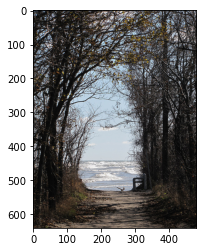

In [10]:
plt.imshow(img)

### 2. Do analysis on the data:

#### 2.1. Count number occurence of words:

In [11]:
word_count = {}
for anno in captions["annotations"]:
    words = re.sub(r'[^\w\s]', '', anno["caption"].lower().strip()).split(" ")
    for word in words:
        if word not in word_count:
            word_count[word] = 0
        word_count[word] += 1

In [12]:
word_count

{'a': 684557,
 'very': 4685,
 'clean': 912,
 'and': 98729,
 'well': 609,
 'decorated': 1232,
 'empty': 2147,
 'bathroom': 10108,
 'panoramic': 25,
 'view': 3764,
 'of': 142759,
 'kitchen': 9361,
 'all': 1851,
 'its': 5795,
 'appliances': 697,
 'blue': 9571,
 'white': 25378,
 'with': 107699,
 'butterfly': 45,
 'themed': 82,
 'wall': 4810,
 'tiles': 227,
 'photo': 3944,
 'dining': 1055,
 'room': 12937,
 'graffitied': 12,
 'stop': 4441,
 'sign': 9711,
 'across': 2523,
 'the': 137977,
 'street': 21189,
 'from': 6533,
 'red': 12074,
 'car': 4954,
 'vandalized': 62,
 'beetle': 6,
 'on': 150673,
 'road': 7098,
 'border': 44,
 'butterflies': 14,
 'paint': 225,
 'walls': 987,
 'above': 2545,
 'it': 16915,
 'an': 34981,
 'angled': 18,
 'beautifully': 30,
 'two': 34094,
 'people': 29652,
 'are': 28811,
 'walking': 10326,
 'down': 16464,
 'beach': 7949,
 'sink': 5640,
 'toilet': 7279,
 'inside': 3994,
 'small': 14125,
 'black': 13393,
 'square': 498,
 'tile': 606,
 'floor': 3282,
 'that': 19523,
 

#### 2.2. Build vocabulary by using the words with occurence greater than 5 in captions:

In [13]:
vocab = [v for v, k in word_count.items() if k >= 5]

In [14]:
PAD = "#PAD#"
UNK = "#UNK#"
START = "#START#"
END = "#END#"
vocab = [PAD, UNK, START, END] + vocab

In [15]:
vocab[:10]

['#PAD#',
 '#UNK#',
 '#START#',
 '#END#',
 'a',
 'very',
 'clean',
 'and',
 'well',
 'decorated']

In [16]:
with open("vocab.pkl", "wb") as f:
    pickle.dump(vocab, f)

#### 2.3. How is caption length distributed?  

In [17]:
len_dist = {}
for anno in captions["annotations"]:
    words = re.sub(r'[^\w\s]', '', anno["caption"].lower().strip()).split(" ")
    if len(words) not in len_dist:
        len_dist[len(words)] = 0
    len_dist[len(words)] += 1

In [30]:
num_lens = len(len_dist)
lens = sorted(list(len_dist.keys()))
occurence = [len_dist[l] for l in lens]

<BarContainer object of 47 artists>

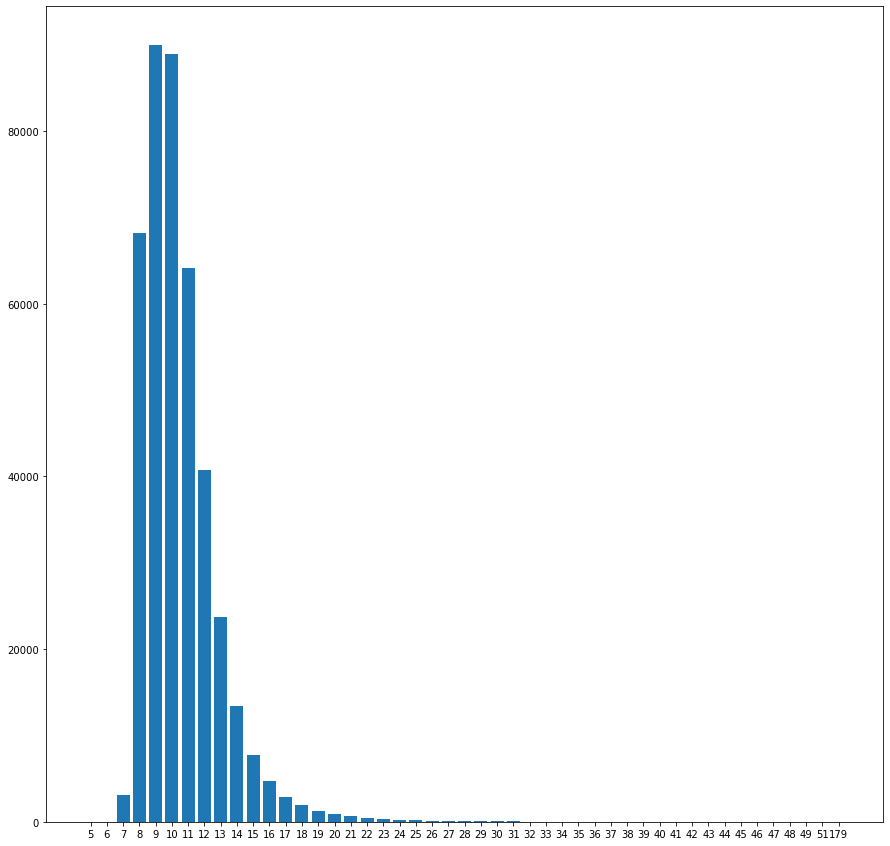

In [38]:
plt.figure(figsize=(15, 15))
plt.bar(range(num_lens), occurence, tick_label=lens)

Observing that most of the caption is shorter than 20, so I choose the the length of 20

In [1]:
import pickle 

with open("vocab.pkl", "rb") as f:
	VOCAB = pickle.load(f)

In [2]:
len(VOCAB)

8845